In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class KMeans:
    def __init__(self, n_clusters, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)
            self.labels=labels
            inertia = np.sum(np.min(distances, axis=1))
            # Update centroids
            new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])

            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
            self.inertia_ = inertia
            self.labels_ = labels
            self.cluster_centers_ = new_centroids
            return self
    def predict(self, X):
        """
        Predict the closest cluster each sample in X belongs to.
        Parameters:
        - X: array-like or pd.DataFrame, shape (n_samples, n_features)
        Returns:
        - labels: array, shape [n_samples,]
        """
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        labels = np.argmin(distances, axis=1)
        return labels


In [ ]:
df = pd.read_csv('/content/customer_segmentation.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Checking for null values

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:

df['Income'] = df['Income'].fillna(method='bfill')

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
def custom_encoder(df, columns):
    encoding_maps = {}  # Store mapping for each column

    for column in columns:
        if df[column].dtype == 'O':  # Check if the column is of object type
            unique_values = df[column].unique()
            encoding_map = {value: idx for idx, value in enumerate(unique_values)}
            encoding_maps[column] = encoding_map
            df[column] = df[column].map(encoding_map)

    return df, encoding_maps


In [ ]:
columns_to_encode = ['Education', 'Marital_Status','Dt_Customer']
df, encoding_maps = custom_encoder(df, columns_to_encode)

<ipython-input-11-790d03307f2a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = None)
<ipython-input-11-790d03307f2a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = None)
<ipython-input-11-790d03307f2a>:7: UserWarning: 

`distplot` is a deprecated function and wi

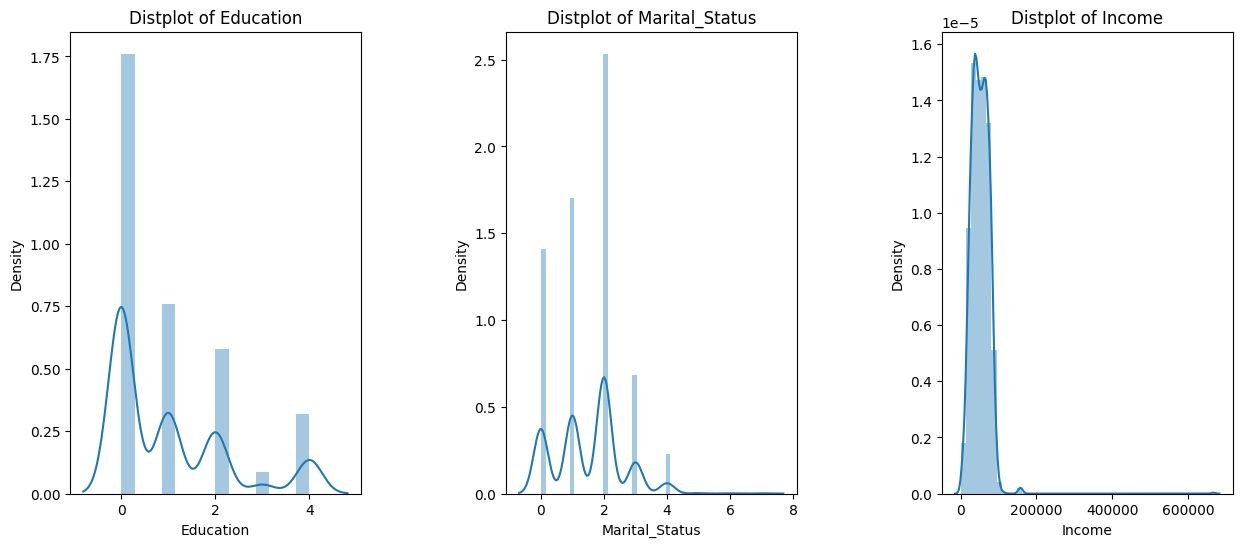

In [ ]:
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['Education', 'Marital_Status' , 'Income']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = None)
    plt.title('Distplot of {}'.format(x))
plt.show()

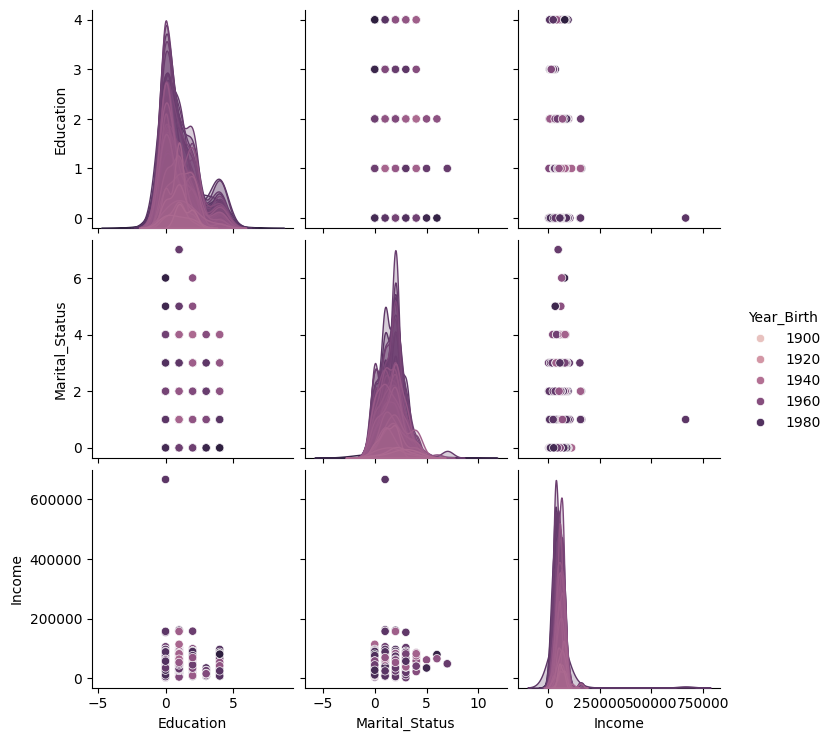

In [ ]:
sns.pairplot(df, vars = ['Education', 'Marital_Status', 'Income'], hue = "Year_Birth")

2D Clustering based on Income and Education

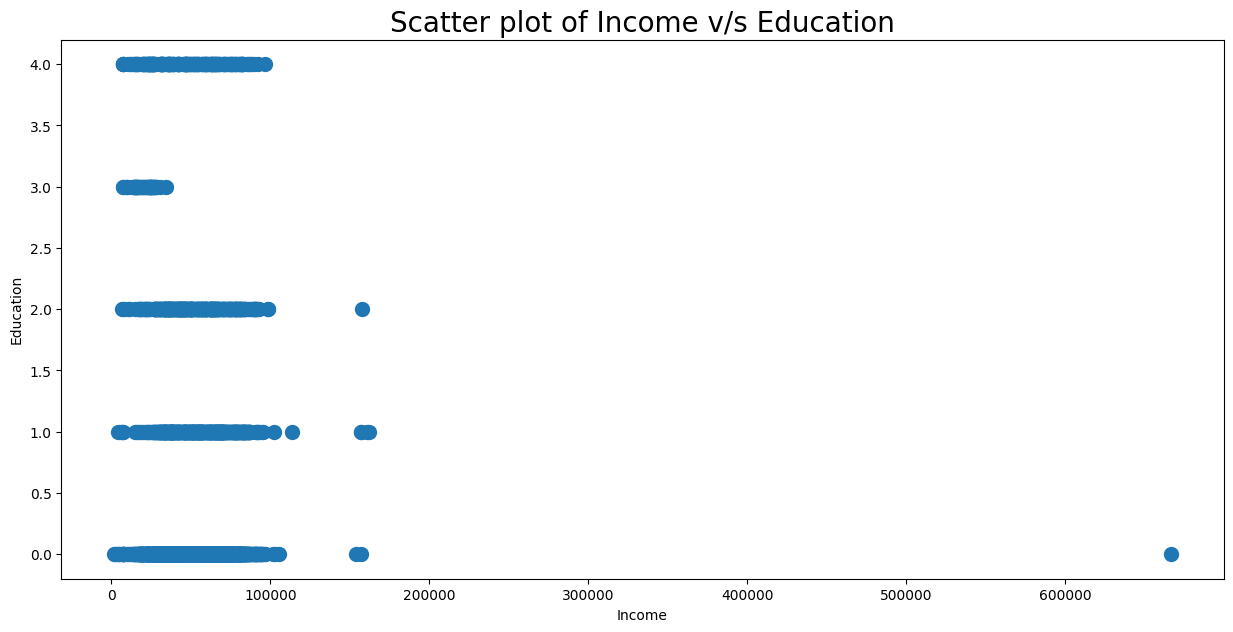

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of Income v/s Education', fontsize = 20)
plt.xlabel('Income')
plt.ylabel('Education')
plt.scatter( x = 'Income', y = 'Education', data = df, s = 100)
plt.show()

Deciding K value

In [ ]:
X1 = df[['Income' , 'Education']].iloc[: , :].values
inertia = []
for n in range(1 , 15):
    algorithm = KMeans(n_clusters = n ,max_iters=300)
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

In [ ]:
df['Income']

0       58138.0
1       46344.0
2       71613.0
3       26646.0
4       58293.0
         ...   
2235    61223.0
2236    64014.0
2237    56981.0
2238    69245.0
2239    52869.0
Name: Income, Length: 2240, dtype: float64

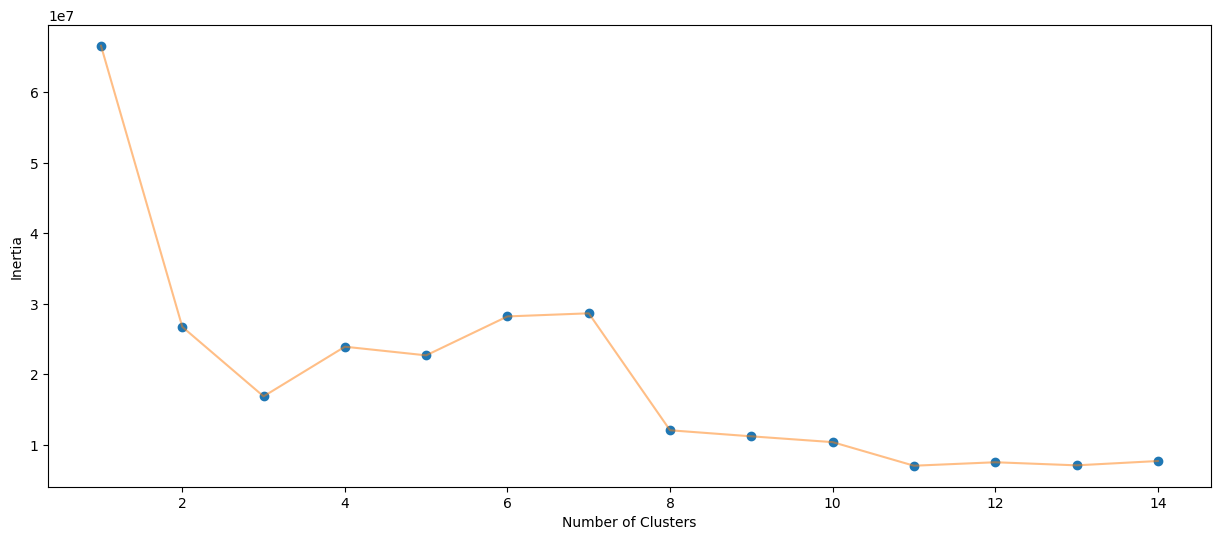

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Applying KMeans for k=4

In [ ]:
algorithm = KMeans(n_clusters = 4 ,max_iters=300)
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
random_indices = np.random.choice(len(X1), size=int(0.1 * len(X1)), replace=False)
X1 = X1[random_indices, :]

In [ ]:
h = 0.05

In [ ]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1


In [ ]:
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1


In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [ ]:
Z = np.empty_like(xx, dtype=float)

batch_size = 1000

for i in range(0, xx.shape[0], batch_size):
    for j in range(0, xx.shape[1], batch_size):
        x_batch = xx[i:i+batch_size, j:j+batch_size].ravel()
        y_batch = yy[i:i+batch_size, j:j+batch_size].ravel()
        mesh_points = np.c_[x_batch, y_batch]
        predictions = algorithm.predict(mesh_points)
        Z[i:i+batch_size, j:j+batch_size] = predictions.reshape(xx[i:i+batch_size, j:j+batch_size].shape)


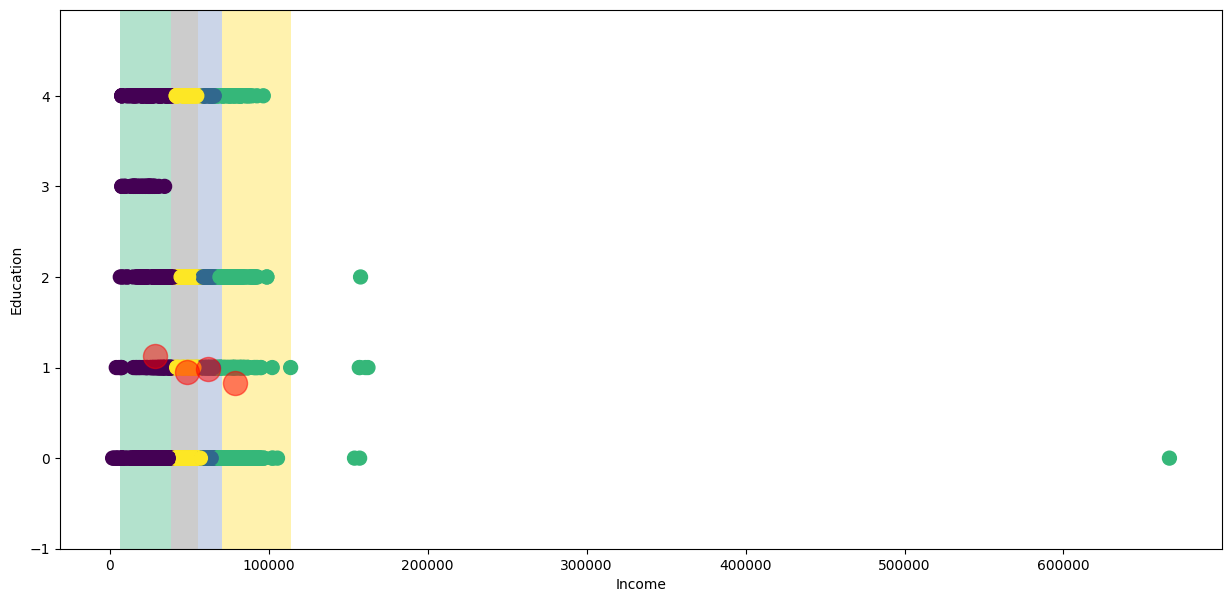

In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Income', y = 'Education', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Education') , plt.xlabel('Income')
plt.show()

Applying KMeans fork=5

In [ ]:
algorithm = KMeans(n_clusters = 5,max_iters=300)
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
h = 0.05

In [ ]:
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1

In [ ]:
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1

In [ ]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [ ]:
Z = np.empty_like(xx, dtype=float)

batch_size = 1000

for i in range(0, xx.shape[0], batch_size):
    for j in range(0, xx.shape[1], batch_size):
        x_batch = xx[i:i+batch_size, j:j+batch_size].ravel()
        y_batch = yy[i:i+batch_size, j:j+batch_size].ravel()
        mesh_points = np.c_[x_batch, y_batch]
        predictions = algorithm.predict(mesh_points)
        Z[i:i+batch_size, j:j+batch_size] = predictions.reshape(xx[i:i+batch_size, j:j+batch_size].shape)


In [ ]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'Income', y = 'Education', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Education') , plt.xlabel('Income')
plt.show()